# Predicting House Prices
The purpose here is to choose the right model for our data set, train the model from data set and test the predictions with testing data.

In [1]:
import graphlab

In [2]:
houses = graphlab.SFrame('home_data.gl/')

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\VGEORG~1\AppData\Local\Temp\graphlab_server_1507038160.log.0


This non-commercial license of GraphLab Create for academic use is assigned to vggeorgiev@mail.bg and will expire on July 04, 2018.


In [3]:
graphlab.canvas.set_target('ipynb')

In [4]:
houses.show(view = 'Scatter Plot', x = 'sqft_living', y = 'price')

## Split data into training and testing.
We use seed=0 so that everyone running this notebook gets the same results. In practice, you may set a random seed (or let GraphLab Create pick a random seed for you).

In [6]:
houses_train, houses_test = houses.random_split(0.9, seed = 0)

In [8]:
features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [10]:
linear_model = graphlab.linear_regression.create(houses_train, target = 'price', features = features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 19410

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 127

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 1.123498     | 3485756.779611     | 153895.604081 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [11]:
print linear_model.evaluate(houses_test)

{'max_error': 3529584.7278047157, 'rmse': 160349.40289527708}


## Visualizing predictions and comparing to the real values

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

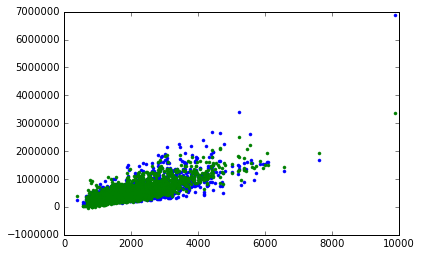

In [18]:
plt.plot(houses_test['sqft_living'], houses_test['price'],'.',
        houses_test['sqft_living'], linear_model.predict(houses_test),'.')

In [19]:
linear_model.get('coefficients')

name,index,value,stderr
(intercept),None,-3373012.0147,6264574.85681
bedrooms,2,4114.49922652,3918.35004
bedrooms,4,-20424.9238273,2911.03245755
bedrooms,5,-40533.3921416,5020.94993476
bedrooms,1,29055.7891408,12550.1069159
bedrooms,6,-84542.4424602,10732.7789041
bedrooms,7,-243381.003988,27404.5957455
bedrooms,8,-143511.883278,47789.1998255
bedrooms,0,31079.4661539,55375.6977228
bedrooms,9,-222797.308361,70229.3303068


## Test with single houses from test data the predictions

In [33]:
house_1 = houses_test[houses_test['id'] == '8820901275']
print house_1['price']

linear_model.predict(house_1)

[571000L, ... ]


dtype: float
Rows: 1
[635061.5089312205]

In [32]:
house_2 = houses_test[houses_test['id'] == '3275860240']
print house_2['price']

linear_model.predict(house_2)

[770000L, ... ]


dtype: float
Rows: 1
[792610.503649733]

## RMSE and RSS
These are two common measures of error regression (RSS and RMSE). RMSE is simply the square root of the mean RS.
RMSE = math.sqrt(RSS/N), where N is the number of data points. RMSE can be more intuitive than RSS, since its units are the same as that of the target column in the data, in our case the unit is dollars ($), and doesn't grow with the number of data points, like the RSS does.